<a href="https://colab.research.google.com/github/chinmaykatdare05/Admission-Prediction-System/blob/main/Admission%20Prediction%20System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Admission Prediction System***

---



[Dataset Source](https://www.kaggle.com/datasets/mukeshmanral/graduates-admission-prediction)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## ***Load the Dataset***

In [ ]:
df = pd.read_csv("Admission Prediction Dataset.csv")
df.drop('StudentID', axis=1, inplace=True)
df.head()

,StudentID,GRE_Score,TOEFL_Score,UniversityRating,SOP,LOR,CGPA,Research,ChanceofAdmit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


***Attributes:***

---

*   **GRE_Score:** Graduate Record Examination (GRE) score of the applicant.

*   **TOEFL_Score:** Test of English as a Foreign Language (TOEFL) score of the applicant.

*   **UniversityRating:** Rating or ranking of the university to which the applicant is seeking admission.

*   **SOP:** Statement of Purpose score provided by the applicant.

*   **LOR:** Letter of Recommendation score provided by the applicant's referees.

*   **CGPA:** Cumulative Grade Point Average obtained by the applicant during their previous academic studies.

*   **Research:** Binary variable indicating whether the applicant has research experience (1 for yes, 0 for no).

*   **ChanceofAdmit:** Dependent variable representing the likelihood of admission to the university.

In [ ]:
df.shape

(500, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   StudentID         500 non-null    int64  
 1   GRE_Score         500 non-null    int64  
 2   TOEFL_Score       500 non-null    int64  
 3   UniversityRating  500 non-null    int64  
 4   SOP               500 non-null    float64
 5   LOR               500 non-null    float64
 6   CGPA              500 non-null    float64
 7   Research          500 non-null    int64  
 8   ChanceofAdmit     500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [ ]:
df.describe()

,StudentID,GRE_Score,TOEFL_Score,UniversityRating,SOP,LOR,CGPA,Research,ChanceofAdmit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


## ***Exploratory Data Analysis***

<Axes: ylabel='GRE_Score'>

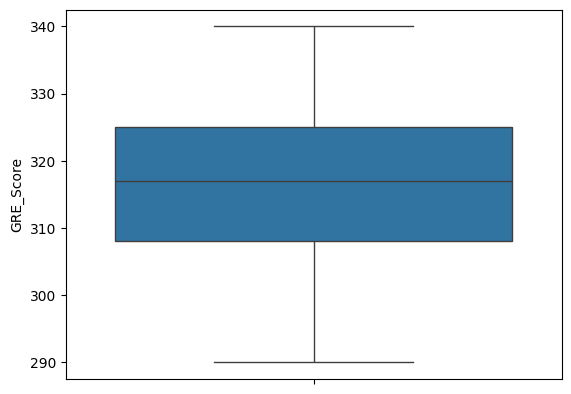

In [ ]:
sns.boxplot(df['GRE_Score'])

<Axes: xlabel='CGPA', ylabel='Count'>

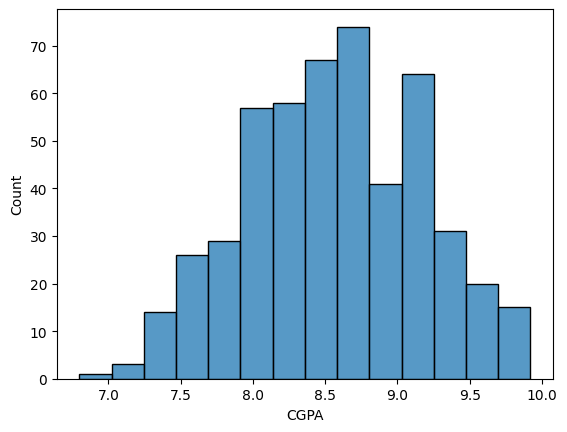

In [ ]:
sns.histplot(df['CGPA'])

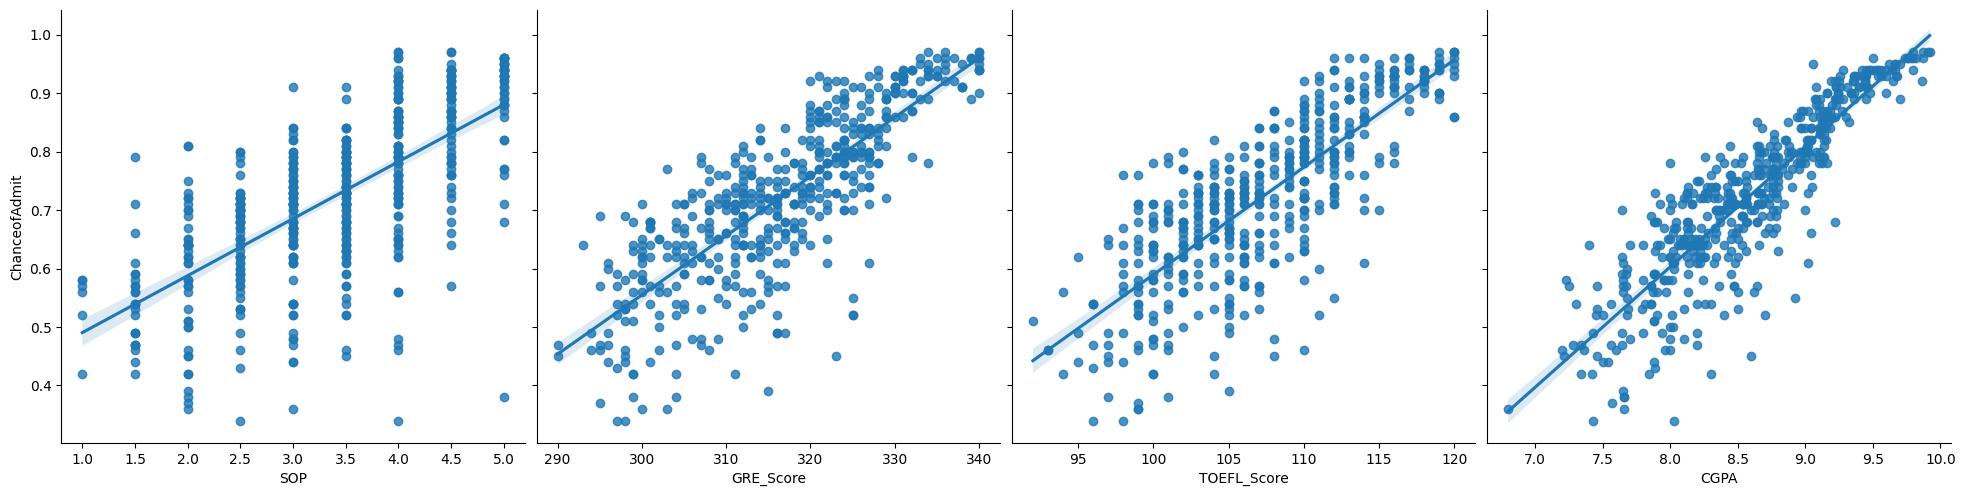

In [ ]:
sns.pairplot(df, x_vars=['SOP','GRE_Score','TOEFL_Score','CGPA'], y_vars=['ChanceofAdmit'], height=5, kind='reg')

<Axes: >

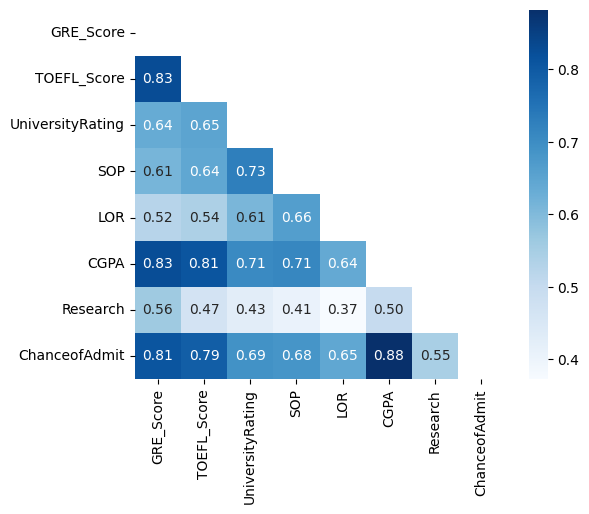

In [ ]:
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), cmap='Blues', annot = True, square=True, fmt=".2f", mask = mask)

## ***Creating Model***

***Algorithm Description:***

Linear regression is a statistical technique used to model the relationship between a dependent variable and one or more independent variables. It assumes that the relationship between the variables can be approximated by a linear equation.

In [ ]:
X = df.drop(['ChanceofAdmit'], axis=1)
y = df['ChanceofAdmit']

In [ ]:
model = LinearRegression(fit_intercept=True, positive=True)
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=42)
model.fit(X_train,y_train)
print('Accuracy:', model.score(X_test, y_test))

Accuracy: 0.8256306039919491


In [ ]:
prediction = model.predict(X_test)
print(prediction[:5])

[0.91741506 0.79586339 0.57331415 0.71296937 0.81766541]


## ***Evaluating the Model***

***Performance Metrics:***

- ***Mean Squared Error (MSE):*** Measures the average squared difference between the observed actual outcomes and the outcomes predicted by the model.
- ***Coefficient of Determination (R^2):*** Measures the proportion of the variance in the dependent variable that is predictable from the independent variables.

In [ ]:
print('Mean Squared Error:', mean_squared_error(y_test, prediction))
print('Coefficient of Determination (R^2):', r2_score(y_test, prediction))

Mean Squared Error: 0.0036342178012511027
Coefficient of Determination (R^2): 0.8256306039919491


## ***Predicting Real World Data***

In [ ]:
user_data = pd.DataFrame({
    'GRE_Score': [325],
    'TOEFL_Score': [112],
    'UniversityRating': [4],
    'SOP': [4.0],
    'LOR': [4.0],
    'CGPA': [9.04],
    'Research': [1]
})

In [ ]:
print(model.predict(user_data)[0])

0.8333498531841692


## ***Conclusion***

---

In conclusion, our Admission Prediction project has shown the effectiveness of using key attributes to predict the likelihood of admission. By analyzing factors such as GRE Score, TOEFL Score, University Rating, Statement of Purpose (SOP), Letter of Recommendation (LOR), CGPA, and Research Experience, our model accurately captures the complexities of the admission process.

The model's performance, evaluated using metrics like Mean Squared Error (MSE) and Coefficient of Determination (R^2), demonstrates its robustness and reliability.

With this model ready for real-world application, it can assist users in making informed decisions about their educational pursuits.